# 1) Импорт библиотек для работы с TDA (ripser, gudhi, dionis) и классификаторами 

In [1]:
from sklearn import metrics
import re
import cython
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from ripser import Rips
from persim import PersImage
from sklearn.svm import SVC
import numpy as np
import os
import re
import pandas as pd
pd_data = {}
data_dir = '../fcla5study/connectivity_matrices/'
data_dir_targ = ''
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import gudhi
import persim #для построения диаграмм 

import h5py                         
import pandas as pd      

import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from tempfile                import mkdtemp
from shutil                  import rmtree
from sklearn.preprocessing   import LabelEncoder
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.pipeline        import Pipeline
from sklearn.model_selection import GridSearchCV

import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with conda or pip  and then try again.")
    sys.exit()

import numpy as np
import sklearn
from sklearn import ensemble
import kmapper as km                      # для визуализации графа
from kmapper.plotlyviz import *

import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
from ipywidgets import (HBox, VBox)


from sklearn_tda import sklearn_tda as tda

import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_approximation import RBFSampler

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

from persim import plot_diagrams
from ripser import ripser, lower_star_img

Cython not found--WassersteinDistance not available


In [2]:
from scipy import sparse

In [61]:
import sys
!{sys.executable} -m pip install spars #на случай нехватки пакета ...

  Could not find a version that satisfies the requirement spars (from versions: )
No matching distribution found for spars


# 2) Загрузка данных (временных рядов или матрицей коннективностей)

In [3]:
data_dir0 = '../fcla5study/connectivity_matrices/'
data_dir1 = '../fcla5study/fmriprep/_task-rest_bold_space-MNI152NLin2009cAsym_preproc/connectivity_matrices/'
data_dir2 = '../fcla5study/openneuro/_task-rest_bold_space-MNI152NLin2009cAsym_preproc/connectivity_matrices/'
data_dir_new = '../fcla5study/fmriprep_connectivity_matrices/'

In [101]:
time_data_dir0 = '../fcla5study/aroma/_task-rest_bold_space-MNI152NLin2009cAsym_preproc/time_series/'
time_data_dir1 = '../fcla5study/fmriprep/_task-rest_bold_space-MNI152NLin2009cAsym_preproc/time_series/'
time_data_dir2 = '../fcla5study/openneuro/_task-rest_bold_space-MNI152NLin2009cAsym_preproc/time_series/'

Это для отдельной таблички

In [82]:
data1 = pd.read_csv('targets 22.03.2018.csv' ,sep = ';')
data1["help"] = data1["D/C"].apply(lambda x: 0 if x == "D" else 1 if x =='C' else 2)
dic = pd.Series(data1.help.values,index=data1.patient_number).to_dict()

### Загрузка таргетов, преобразование колонок болезней в метки и создание словаря {номер пациента - метка болезни

In [9]:
data = pd.read_csv('LA5study_targets.csv')
data['participant_id'] = data['participant_id'].apply(lambda x: re.findall(r'\b\d+\b',x)[0])
data["help"] = data["diagnosis"].apply(lambda x: 0 if x == "CONTROL" else 1 if x =='SCHZ' else 2 if x == 'BIPOLAR' else 3 if x == 'ADHD' else 4)
dic = pd.Series(data.help.values,index=data.participant_id).to_dict()


In [11]:
data.head(7)

,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,...,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost,label,Bipolar/Control,Bipolar/NotBipolar,ADHD/Control,Schz/Control,help
0,10159,CONTROL,30,F,1.0,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,35343.0,No_ghost,CONTROL,0.0,0,0.0,0.0,0
1,10171,CONTROL,24,M,1.0,1.0,1.0,NaN,NaN,1.0,...,1.0,1.0,35343.0,No_ghost,CONTROL,0.0,0,0.0,0.0,0
2,10189,CONTROL,49,M,1.0,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,35343.0,No_ghost,CONTROL,0.0,0,0.0,0.0,0
3,10193,CONTROL,40,M,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,35343.0,No_ghost,CONTROL,0.0,0,0.0,0.0,0
4,10206,CONTROL,21,M,1.0,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,35343.0,No_ghost,CONTROL,0.0,0,0.0,0.0,0
5,10217,CONTROL,33,F,1.0,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,35343.0,No_ghost,CONTROL,0.0,0,0.0,0.0,0
6,10225,CONTROL,35,M,1.0,1.0,1.0,NaN,NaN,1.0,...,1.0,1.0,35343.0,No_ghost,CONTROL,0.0,0,0.0,0.0,0


### Mutual information 

In [100]:
import numpy as np

def calc_MI(X,Y,bins):
#     c_xy = np.histogram2d(X, Y, bins)[0]
#     g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
#     mi = 0.5 * g / c_xy.sum()
#     return mi

    c_XY = np.histogram2d(X,Y,bins)[0]
    c_X = np.histogram(X,bins)[0]
    c_Y = np.histogram(Y,bins)[0]
 
    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)
 
    MI = H_X + H_Y - H_XY
    answ = H_X + H_Y - 2*MI
    return answ

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

# A = np.array([[ 2.0,  40.0,  128.23, -150.5, -222.4  ],
#               [ 2.4,  3.11, 130.34, -0.1, -9.5  ],
#               [ 1.2,  6.9,  20.11, -110.45,-1.12 ]])

#bins = 5 # ?
#A = ts_data['10871']
#bins = ts_data['10871'].shape[1]
#n = A.shape[1]
#matMI = np.zeros((n, n))


def mutual_inf(A, n):
    matMI = np.zeros((n, n))
    for ix in np.arange(n):
        for jx in np.arange(ix+1,n):
            matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], n)
    return matMI

# Теперь посмотрим на доступные фичи и определим новые

# Сначала посмотрим на следующие фичи:
## 1) Landscape http://jmlr.org/papers/v16/bubenik15a.html
## 2) PersistenceImage http://jmlr.org/papers/v18/16-337.html
## 3) BettiCurve https://www.jstage.jst.go.jp/article/tjsai/32/3/32_D-G72/_pdf
## 4) Silhouette https://arxiv.org/pdf/1312.0308.pdf
## 5) TopologicalVector https://diglib.eg.org/handle/10.1111/cgf12692
## 6) ComplexPolynomial https://arxiv.org/abs/1505.01335
## 7) PersistenceScaleSpaceKernel  https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Reininghaus_A_Stable_Multi-Scale_2015_CVPR_paper.pdf
## 8) PersistenceWeightedGaussianKernel   http://proceedings.mlr.press/v48/kusano16.html
## 9) PersistenceFisherKernel 

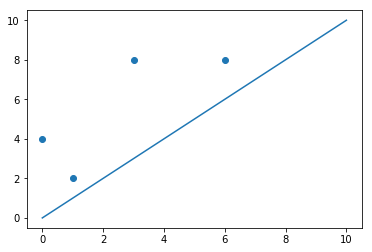

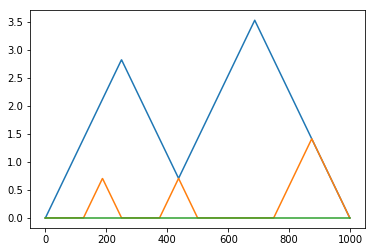

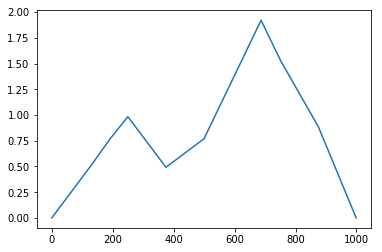

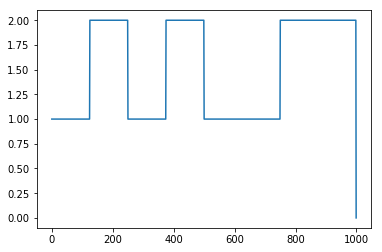

Complex polynomial is [  4.31020911 +3.78255248j   0.62602147+17.72198117j
 -14.03266655+14.19824852j  -9.38453999 +3.45404244j]
Topological vector is [2.  1.  1.  0.5]


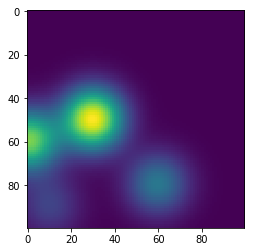

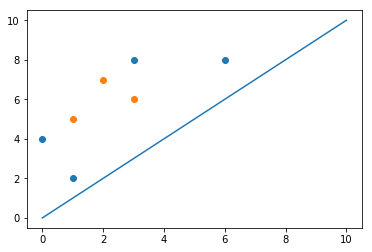

PWG kernel with diags2 is [0.69194396]
PWG kernel is 0.6919439562755372
Approximate PWG kernel is 0.7081020338086101
PSS kernel is 0.7087277567453032
Approximate PSS kernel is 0.7167949537206231
SW distance is 4.825920844404907
SW kernel is 0.0080191660652045
SW kernel_old is SlicedWassersteinKernel(bandwidth=None, num_directions=None)
Cython required---returning null matrix
1-Wasserstein distance is 0.0
PF kernel is 0.6193021198905548
Approximate PF kernel is 0.6162993687866898


In [10]:
#import sklearn_tda as tda
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_approximation import RBFSampler

D = np.array([[0.,4.],[1.,2.],[3.,8.],[6.,8.]])
plt.scatter(D[:,0],D[:,1])
plt.plot([0.,10.],[0.,10.])
plt.show()

diags = [D]

LS = tda.Landscape(resolution = 1000)
L = LS.fit_transform(diags)
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.show()

def pow(n):
    return lambda x: np.power(x[1]-x[0],n)

SH = tda.Silhouette(resolution=1000, weight=pow(2))
sh = SH.fit_transform(diags)
plt.plot(sh[0])
plt.show()

BC = tda.BettiCurve(resolution=1000)
bc = BC.fit_transform(diags)
plt.plot(bc[0])
plt.show()

CP = tda.ComplexPolynomial(threshold=-1, F="T")
cp = CP.fit_transform(diags)
print("Complex polynomial is " + str(cp[0,:]))

TV = tda.TopologicalVector(threshold=-1)
tv = TV.fit_transform(diags)
print("Topological vector is " + str(tv[0,:]))

diagsT = tda.DiagramPreprocessor(use=True, scalers=[([0,1], tda.BirthPersistenceTransform())]).fit_transform(diags)
PI = tda.PersistenceImage(bandwidth=1., weight=lambda x: x[1], im_range=[0,10,0,10], resolution=[100,100])
pi = PI.fit_transform(diagsT)
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.show()

plt.scatter(D[:,0],D[:,1])
D = np.array([[1.,5.],[3.,6.],[2.,7.]])
plt.scatter(D[:,0],D[:,1])
plt.plot([0.,10.],[0.,10.])
plt.show()

diags2 = [D]

def arctan(C,p):
    return lambda x: C*np.arctan(np.power(x[1], p))

PWG = tda.PersistenceWeightedGaussianKernel(bandwidth=1., kernel_approx=None, weight=arctan(1.,1.))
X = PWG.fit(diags)
Y = PWG.transform(diags2)
print("PWG kernel with diags2 is", Y[0])
print("PWG kernel is " + str(Y[0][0]))

PWG = tda.PersistenceWeightedGaussianKernel(kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])), weight=arctan(1.,1.))
X = PWG.fit(diags)
Y = PWG.transform(diags2)
print("Approximate PWG kernel is " + str(Y[0][0]))

PSS = tda.PersistenceScaleSpaceKernel(bandwidth=1.)
X = PSS.fit(diags)
Y = PSS.transform(diags2)
print("PSS kernel is " + str(Y[0][0]))

PSS = tda.PersistenceScaleSpaceKernel(kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])))
X = PSS.fit(diags)
Y = PSS.transform(diags2)
print("Approximate PSS kernel is " + str(Y[0][0]))

sW = tda.SlicedWassersteinDistance(num_directions=100)
X = sW.fit(diags)
Y = sW.transform(diags2)
print("SW distance is " + str(Y[0][0]))


SW = tda.SlicedWassersteinKernel(num_directions=100, bandwidth=1.)
X = SW.fit(diags)
Y = SW.transform(diags2)
print("SW kernel is " + str(Y[0][0]))
print("SW kernel_old is " + str(X))

W = tda.WassersteinDistance(wasserstein=1, delta=.001)
X = W.fit(diags)
Y = W.transform(diags2)
print("1-Wasserstein distance is " + str(Y[0][0]))

PF = tda.PersistenceFisherKernel(bandwidth_fisher=1., bandwidth=1.)
X = PF.fit(diags)
Y = PF.transform(diags2)
print("PF kernel is " + str(Y[0][0]))

PF = tda.PersistenceFisherKernel(bandwidth_fisher=1., bandwidth=1., kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])))
X = PF.fit(diags)
Y = PF.transform(diags2)
print("Approximate PF kernel is " + str(Y[0][0]))

## 1) Центр масс для диаграммы в координатах (рождение - продолжительность жизни)
## 2) Новое расстояние Вассерштайна
## 3) Фичи для комплексных полиномов
## 4) Представление диаграммы как гистограммы (вычисление среднего, максимумов)

In [63]:
#фунция вычисляет среднее арифметическое (центр масс для диаграммы в осях время рождения - продолжительность жизни)
def center(diagram):
    arr = []
    for i in diagram:
        h = []
        h.append(i[0])
        h.append(i[1] - i[0]) #вычисление продолжительности жизни
        arr.append(h)
    arr = np.array(arr)
    height = 0
    summ = 0
    for i in arr:
        #print(i[1])
        if i[1] <5:
            height = height + i[1]
            summ = summ + 1
    center_m = height/summ
    return center_m

def new_wass(diag1, diag2, p): #введение ногого расстояние вассерштайна через разбиение диаграммы на части
    center1 = center(diag1) #вычисление центра масс
    center2 = center(diag2)
    big1 = np.asarray([x for x in diag1 if ((x[1] - x[0]) >= center1)]) #берем часть дианраммы выше центра масс
    center_big1 = center(big1)
    little1 = np.asarray([x for x in diag1 if ((x[1] - x[0]) < center1)]) #берем часть дианраммы ниже центра масс
    center_little1 = center(little1)
    big2 = np.asarray([x for x in diag2 if ((x[1] - x[0]) >= center2)])
    center_big2 = center(big2)
    little2 = np.asarray([x for x in diag2 if ((x[1] - x[0]) < center2)])
    center_little2 = center(little2)
    wdist1 = persim.sliced_wasserstein(big1, big2, M=p)
    wdist2 = persim.sliced_wasserstein(big1, little2, M=p)
    wdist3 = persim.sliced_wasserstein(little1, big2, M=p)
    wdist4 = persim.sliced_wasserstein(little1, little2, M=p)
    #answer = (center_big1+ center_big2)*wdist1 +(center_big1+ center_little2)*wdist2 + (center_little1+ center_big2)*wdist3+(center_little1+ center_little2)*wdist4
    answer = 4*wdist1 +2*wdist2 + 2*wdist3+wdist4
    return answer


def new_diagram(diagram): 
    diagrams_h2 = []#убирает пустые диаграммы пациентов (которые возникают при ripser)
    #print("diagram",diagram)
    for x in diagram:
        
        #print('x',x, '\n')
        for j in x:
            #print('j', j)
            if(j[1] == 'inf'):
                j[1] = 2
            else:
                continue
        
        
            
#         if(len(x) != 0):
#             for j in x:
#                 #print('j',j)
#                 for p in j:
                    
#                     if(p[1]=='inf'):
#                         p[1] = 2
#                     else:
#                         continue
        diagrams_h2.append(x)
#         else:
#             diagrams_h2.append(np.asanyarray([[0,0]]))
    return diagrams_h2

def cp_features_final(diagram):  #фичи для комплексных полиномов, конкактенируя действительную и мнимую части       
    cp = CP.fit_transform(diagram)
    feature1 = cp.imag
    feature2 = cp.real
    cp_feature = []
    for u in np.arange(0, len(feature1),1):
        cp_feature.append(np.append(feature1[u], feature2[u]))
    cp_feature = np.asarray(cp_feature)
    return cp_feature


def diag_to_array(data):
    dataset, num_diag = [], len(data["0"].keys())
    for dim in data.keys():
        X = []
        for diag in range(num_diag):
            pers_diag = np.array(data[dim][str(diag)])
            X.append(pers_diag)
        dataset.append(X)
    return dataset

def diag_to_dict(D):
    X = dict()
    for f in D.keys():
        df = diag_to_array(D[f])
        for dim in range(len(df)):
            X[str(dim) + "_" + f] = df[dim]
    return X 

def new_features(diagr):
    #print('diagr', diagr)
    #print('init....')
    ##считает вектор средних (разбивая диаграмму на 20 частей, максимумов и гистограмму - число точек в каждой части)
    init = 0.01
    
    
    final = 0.99
    delta = (final - init)/30
    arr = {}
    for i in np.arange(0,31,1):
        arr[i] = []
    s = []
#     for j in diagr:
#         print(j)
#         s.append(j[1] - j[0]) 
#     s = np.asarray(s)
#     average = np.mean(s)
    
    for i in diagr:
        
        #print('start')
        #print(i[0])
        w = int((i[0]-init)//delta)
        #print(w)
#         if ((i[1] - i[0]) > average):
            
#             arr[w].append(i[1] - i[0])
#         else:
#             arr[w].append(0)
        arr[w].append(i[1] - i[0])
        #print('ah')
    vector_mean = []
    vector_max = []
    vector_hist = []
    for i in np.arange(0,30,1):
        #print(i)
        if len(np.asarray(arr[i])) != 0:
            #print('uuu')
            vector_mean.append(np.asarray(arr[i]).mean())
            #print('mean')
            vector_max.append(np.asarray(arr[i]).max())
            #print('max')
            vector_hist.append(len(arr[i])/len(diagr))
            #print('hist')
        else:
            #print('uuu')
            vector_mean.append(0)
            vector_max.append(0)
            vector_hist.append(0)
    vector_all = np.concatenate((vector_mean, vector_max, vector_hist), axis=0)
            #print('ooo')
    return vector_mean, vector_max, vector_hist, vector_all

## Определение классификаторов и фичей в экспериментах

In [86]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "SVM01", #Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "LogisticRegression", "XGBClassifier"]

names = ["Linear SVM", "RBF SVM", "SVM01"]

classifiers = [
    #KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    SVC(gamma= 0.01, probability=True),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    #DecisionTreeClassifier(max_depth=5, probability = True),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
#     LogisticRegression(),
#     XGBClassifier()
    ]


name_methods = ["sh", "l", "bc",  "cp", "f1", "f2", "f3", "f4"]
#name_methods = ["bc", "tv", "cp", "f1", "f2", "f3"]
#name_methods = ["f1", "f2", "f3"]

In [13]:
n_splits = 5
n_repeats = 5 
random_state = 42
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)


# Функция главного процесса

In [93]:
import csv

def all_stat(thresh, data_dir,hint, disease_name, disease, name_stat, name_features, name_keys, begin, end, step):
    #---------------------------------------------------------------------------------------------
    #data_dir - directory of data
    #disease - label of disease (1- SCH, 2-Bipolar, 3 - ADHD)
    #name_stat file recording all statistics of features
    #name_features - file recording features for the future classification by Katia
    #name_keys - file of labels (keys)
    #begin - start value of the radious of rips complex
    #end - final value of the radious of rips complex
    #step - step of value of the radious of rips complex
    #---------------------------------------------------------------------------------------------
    #initialization of methods for features
    SH = tda.Silhouette(resolution=100, weight=pow(2))
    LS = tda.Landscape(resolution = 100)
    BC = tda.BettiCurve(resolution=100)
    CP = tda.ComplexPolynomial(threshold=-1, F="T")
    TV = tda.TopologicalVector(threshold=-1)
    #initialization of kfold method
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    
    
    fs = os.listdir(data_dir)
    import re
    corr_dict = {}
    subs = [] #массив номеров поциентов
    i = 0
    diagrams_h1 = [] #массив для персистетных диаграмм всех пациентов
    feat_1 = []
    feat_2 = []
    feat_3 = []
    feat_4 = []
    auc_score = []
    #initialization of the best valuses of feature, accuracy, method and feature
    best_feature = [1,2,3]
    best_accurace = 0.001
    best_accuracy_all = 0
    best_name = 'f'
    best_p = 0.1
    best_method = 't'
    best_name1 = 'e'
    best_method1 = 'rt'
    best_std_score = 0
    with open(name_stat, 'w') as file:
        for ind in np.arange(begin, end, step):
            rips = Rips(maxdim=2, coeff=2, do_cocycles=False,thresh=ind);
            for f in fs:
                
                if (f == '.ipynb_checkpoints' or f == '.DS_Store'):
                    continue
                sub = f[4:8]
                #print('sub', sub)
                #sub = re.findall(r'\b\d+\b',f)[0] #выделяем в имени файла пациента его порядковый номер
                subs.append(sub) 
                test = dic.get(sub) #находим метку болезни по номеру пациента из словаря
                #print(test)
                if sub not in corr_dict: #если пациента еще нет в словаре
                    #print(sub)
                  
                    if (test == 0 or test == disease):  #смотрим, относится ли пациент к классу здоровых или выбранной категории больных
                        corr_dict[sub] = {} #заводим словарь {номер пациента - корреляционная матрица}
                        #corr_dict[sub][test] = np.loadtxt(data_dir+f, delimiter=',', skiprows=4)
                        corr_dict[sub][test] = pd.read_csv(data_dir+f, index_col=[0]).values #запись в словарь корелляционной матрицы
                        corr_dict[sub][test][corr_dict[sub][test]< thresh] = 0
                   
            labels = [] #заводим массив для меток
            w = 0
            print('начало')
            with open("All_features/"+str(hint)+ "/" + disease_name + "/" + name_keys, mode='w') as hope: #файл для записи ключей (таргетов пациентов)
                
                for i, sub in enumerate(corr_dict):
                   # print('sub', sub)
                    #hope.write(str(sub)+','+str(list(corr_dict[sub].keys())[0])+'\n')  
                    hope.write(str(list(corr_dict[sub].keys())[0])+'\n')
                    labels.append(list(corr_dict[sub].keys())[0]);
                        # note that we use 1-corr because these are pearson correlations and hence 
                        # this is a proper metric
                    dist = np.asanyarray(list(corr_dict[sub].values()))[0]
                    
                    
                    #dist[dist < thresh] = 0
                    
                    
                    #print('dist', dist)
                    #находим персистетные диаграммы из корреляционной матрицы делая 1 - |corr_matr|
                    diagrams_h1.append(rips.fit_transform(1 - np.abs(dist), distance_matrix=True)[2]) #don't forget the distance matrix flag!
                    
            #print(diagrams_h1)
            s = 0
            diagrams_h4 = new_diagram(diagrams_h1)
            for i in np.arange(0,len(diagrams_h4),1):
                s = s+1
                #print(s)
                #print(diagrams_h1[i])
                a,b,c, d = new_features(diagrams_h4[i])
                feat_1.append(a)
                feat_2.append(b)
                feat_3.append(c)
                feat_4.append(d)
            feat_1 = np.asarray(feat_1)
            feat_2 = np.asarray(feat_2)
            feat_3 = np.asarray(feat_3)
            feat_4 = np.asarray(feat_4)
            #feat_4 = np.concatenate((feat_1, feat_2, feat_3), axis=0)
            
            
            pim = PersImage(pixels=([28,28]), spread=None)
            #print(pim)
            ####methods applying
            imgs = pim.transform(diagrams_h1)
            imgs_array = np.array([img.flatten() for img in imgs]) #получение фичей для persistence image
            
            #sh = SH.fit_transform(diagrams_h1) #получение фичей для shiluate
            
            #l = LS.fit_transform(diagrams_h1) #получение фичей для persistence landscape
            
            
            
            #Persistence image using TDA package (more adequate features)
            #diagsT = tda.DiagramPreprocessor(use=True, scalers=[([0,1], tda.BirthPersistenceTransform())]).fit_transform(diagrams_h1)
            PI = tda.PersistenceImage(bandwidth=1., weight=lambda x: 100*x[1], im_range=[0,1,0,1], resolution=[20,20])
            pi = PI.fit_transform(diagrams_h1)
            
            diagrams_h2 = new_diagram(diagrams_h1)
            cp_feature = cp_features_final(diagrams_h2) #complex polinomial
            
            diagrams_h3 = diagrams_h2
            #print(diagrams_h3)
            bc = BC.fit_transform(diagrams_h3) #betti curves
            
            #tv = TV.fit_transform(diagrams_h2) #topological vectors
            sh = SH.fit_transform(diagrams_h2) #получение фичей для shiluate
            
            l = LS.fit_transform(diagrams_h2) #получение фичей для persistence landscape
        
            features = [
                #imgs_array,
                #pi,
                sh,
                l,
                bc,
                #tv,
                cp_feature,
                feat_1,
                feat_2,
                feat_3,
                feat_4

            ] 
        
            labels = np.asarray(labels)
            
            file.write('---------'+str(ind)+'---------')
            file.write('\n')
            print('***********************dataset is',hint,  '***********************', '\n')
            print('***********************disease is',disease_name,  '***********************', '\n')
            
            for name_m, feature in zip(name_methods, features):
                file.write(name_m)
                file.write('\n')
                print('----------'+name_m+'------------')
                for name, clf in zip(names, classifiers):
                    arr_score = []
                    auc_score = []
                    for train_index, test_index in cv.split(feature, labels):
                        X_train, X_test = feature[train_index], feature[test_index]
                        y_train, y_test = labels[train_index], labels[test_index]
                        
                        
                        clf.fit(X_train, y_train)
                        probas_ = clf.predict_proba(X_test)
                        probs = probas_[:, 1]
                        
                        #print(probas_)
                        y_pred = clf.predict(X_test)
                        
                        arr_score.append(clf.score(X_test, y_test))
                        auc = roc_auc_score(y_test, probs)
                        
                        
                        auc_score.append(auc)
                    arr_score = np.asanyarray(arr_score)
                    auc_score = np.asanyarray(auc_score)
                    a = np.mean(arr_score)
                    b = np.mean(auc_score)
                    std_score = arr_score.std() * 2
                    std_score1 = auc_score.std() * 2
                    if b>best_accurace: #процедура для нахождения "победителя"
                        best_accurace = b
                    
                        best_name = name
                        best_p = ind
                        best_method = name_m
                        best_std_score = std_score
                        best_feature = feature
                    if a > best_accuracy_all:
                        best_accuracy_all = a
                        best_name = name
                        best_method1 = name_m
                    #print(np.std(arr_score))
                    #print(arr_score)
                    print(name+"Auc Score: %0.6f (+/- %0.6f)" % (b, std_score1))
                    print(name+"Accuracy: %0.6f (+/- %0.6f)" % (a, std_score))
#                     file.write(name+"Accuracy: %0.6f (+/- %0.6f)" % (a, std_score))
#                     file.write('\n')
                with open("All_features/"+ hint + '/' + disease_name + '/' +  name_m+'.csv', mode='w') as employee_file:
                    employee_writer = csv.writer(employee_file, delimiter=',')
                    for u in feature:
                        employee_writer.writerow(u)
                print("****************************************************", '\n')
                print('best_auc_score', best_accurace, '\n')
#             file.write('-----------------------------------')
#             file.write('-----------------------------------')
#             file.write('-----------------------------------')
#             file.write('\n')
#             file.write('best_accuracy' + str(best_accurace) + '\n')
#             file.write('best_std_score' + str(best_std_score) + '\n')
#             file.write('best_name' + str(best_name) + '\n')
#             file.write('best_method' + str(best_method) + '\n')
#             file.write('best_p' +  str(best_p) + '\n')
#             print('best_feature', best_feature)
            
#             with open(name_features, mode='w') as employee_file:
#                 employee_writer = csv.writer(employee_file, delimiter=',')
#                 for u in best_feature:
#                     employee_writer.writerow(u)
                    
    print('best_accuracy_auc', best_accurace)
    print('best_std_score', best_std_score)
    print('best_name', best_name)
    print('best_method', best_method)
    print('best_p', best_p)
    print('best_accuracy', best_accuracy_all)
    print('best_std_score', best_std_score)
    print('best_name', best_name1)
    print('best_method', best_method1)
    print('best_p', best_p)
    return best_accurace, best_accuracy_all

# Примеры запуска экмпериментов:

In [203]:
all_stat(data_dir0, 'aroma', "schz",1, "1aroma_check_all_SCHZ.txt", "aroma_SCHZ_features.csv", "keys_aroma-schz.txt",1, 1.1, 0.2)
all_stat(data_dir0, 'aroma', "bipolar", 2, "1aroma_check_all_Bipolar.txt", "aroma_Bipolar_features.csv", "keys_aroma-bipolar.txt", 1, 1.1, 0.2)
all_stat(data_dir0, 'aroma', "adhd", 3, "1aroma_check_all_ADHD.txt", "aroma_ADHD_features.csv", "keys_aroma-adhd.txt", 1, 1.1, 0.2)
all_stat(data_dir1, 'fmriprep', "schz", 1, "1fmriprep_check_all_SCHZ.txt", "bound_SCHZ_features.csv", "keys_bound-schz.txt", 1, 1.1, 0.2)
all_stat(data_dir1, 'fmriprep', "bipolar", 2, "1fmriprep_check_all_Bipolar.txt", "bound_Bipolar_features.csv","keys_bound-bipolar.txt", 1, 1.1, 0.2)
all_stat(data_dir1, 'fmriprep', "adhd", 3, "1fmriprep_check_all_ADAD.txt", "bound_ADHD_features.csv","keys_bound-adhd.txt", 1, 1.1, 0.2)
#all_stat(data_dir2, 'openneuro', "schz", 1, "1openneuro_check_all_SCHZ.txt", "openneuro_SCHZ_features.csv","keys_openneuro-SCHZ.txt", 1, 1.1, 0.2)
#all_stat(data_dir2, 'openneuro',"bipolar", 2, "1openneuro_check_all_BIPOLAR.txt", "openneuro_Bipolar_features.csv","keys_openneuro-bipolar.txt", 1, 1.1, 0.2)
#all_stat(data_dir2, 'openneuro', "adhd", 3, "1openneuro_check_all_ADHD.txt", "openneuro_ADHD_features.csv", "keys_openneuro-adhd.txt", 1, 1.1, 0.2)

TypeError: all_stat() missing 1 required positional argument: 'step'

In [92]:
all_stat(0.2, data_dir_new , 'aroma', "adhd",1, "1aroma_check_all_SCHZ.txt", "aroma_SCHZ_features.csv", "keys_aroma-schz.txt",2, 2.1, 0.2)
#all_stat(0.3, data_dir0, 'aroma', "schz",1, "1aroma_check_all_SCHZ.txt", "aroma_SCHZ_features.csv", "keys_aroma-schz.txt",1, 1.1, 0.2)
#all_stat(0.2, data_dir0, 'aroma', "schz",1, "1aroma_check_all_SCHZ.txt", "aroma_SCHZ_features.csv", "keys_aroma-schz.txt",1, 1.1, 0.2)
#all_stat(0.1, data_dir0, 'aroma', "schz",1, "1aroma_check_all_SCHZ.txt", "aroma_SCHZ_features.csv", "keys_aroma-schz.txt",1, 1.1, 0.2)

Rips(maxdim=2, thresh=2.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
начало
PersImage(pixels=[28, 28], spread=None, specs=None, kernel_type="gaussian", weighting_type="linear")
***********************dataset is aroma *********************** 

***********************disease is adhd *********************** 

----------sh------------
Linear SVMAuc Score: 0.556800 (+/- 0.198452)
Linear SVMAccuracy: 0.496000 (+/- 0.068819)
RBF SVMAuc Score: 0.522400 (+/- 0.226929)
RBF SVMAccuracy: 0.496000 (+/- 0.068819)
SVM01Auc Score: 0.548000 (+/- 0.221414)
SVM01Accuracy: 0.496000 (+/- 0.068819)
**************************************************** 

best_auc_score 0.5568 

----------l------------
Linear SVMAuc Score: 0.535200 (+/- 0.208700)
Linear SVMAccuracy: 0.436000 (+/- 0.137171)
RBF SVMAuc Score: 0.498400 (+/- 0.126956)
RBF SVMAccuracy: 0.436000 (+/- 0.137171)
SVM01Auc Score: 0.560000 (+/- 0.226557)
SVM01Accuracy: 0.428000 (+/- 0.155126)
***********************************************

0.6944

In [95]:
answ_best = 0
answ_best1 = 0
j_best = 0
j_best1 = 0
for j in np.arange(0.1,0.9,0.05):
    answ, answ1 = all_stat(j, data_dir_new, 'aroma', "schz",1, "1aroma_check_all_SCHZ.txt", "aroma_SCHZ_features.csv", "keys_aroma-schz.txt",2, 2.1, 0.2)
    if (answ >answ_best):
        answ_best = answ
    if (answ1 >answ_best1):
        answ_best1 = answ1
        j_best1 = j

Rips(maxdim=2, thresh=2.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
начало
PersImage(pixels=[28, 28], spread=None, specs=None, kernel_type="gaussian", weighting_type="linear")
***********************dataset is aroma *********************** 

***********************disease is schz *********************** 

----------sh------------
Linear SVMAuc Score: 0.571200 (+/- 0.265349)
Linear SVMAccuracy: 0.496000 (+/- 0.068819)
RBF SVMAuc Score: 0.564000 (+/- 0.251714)
RBF SVMAccuracy: 0.496000 (+/- 0.068819)
SVM01Auc Score: 0.558400 (+/- 0.271274)
SVM01Accuracy: 0.496000 (+/- 0.068819)
**************************************************** 

best_auc_score 0.5711999999999999 

----------l------------
Linear SVMAuc Score: 0.548800 (+/- 0.216468)
Linear SVMAccuracy: 0.436000 (+/- 0.137171)
RBF SVMAuc Score: 0.551200 (+/- 0.229107)
RBF SVMAccuracy: 0.436000 (+/- 0.137171)
SVM01Auc Score: 0.556800 (+/- 0.232601)
SVM01Accuracy: 0.428000 (+/- 0.155126)
***********************************

AUC: 0.895


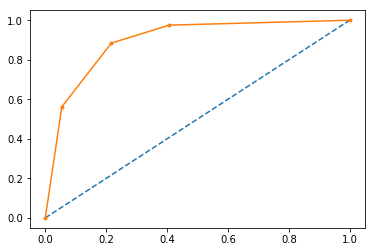

In [59]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Аналогичная главной функция для Gudhi (надо скачать с сайта http://gudhi.gforge.inria.fr/python/latest/)

In [13]:
import gudhi
def new_diagon(diag):
    t = (0,1000)
    new_diag = []
    for i in diag:
        if(i[1][1] < 1):     
            new_diag.append(list(i[1])) 
        else:
            #new_diag.append(list(i[1])) 
            new_diag.append(list(t))
    new_diag = np.asarray(new_diag)
    return new_diag

def gudhi_help(data_dir, disease):
    
    rips = Rips(maxdim=2, coeff=2, do_cocycles=False,thresh=3)
    SH = tda.Silhouette(resolution=100, weight=pow(2))
    LS = tda.Landscape(resolution = 100)
    BC = tda.BettiCurve(resolution=100)
    CP = tda.ComplexPolynomial(threshold=-1, F="T")
    TV = tda.TopologicalVector(threshold=-1)
    
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=36851234)
    
    
    fs = os.listdir(data_dir)
    import re
    corr_dict = {}
    subs = []
    i = 0
    
    best_feature = [1,2,3]
    best_accurace = 0.001
    best_name = 'f'
    best_p = 0.1
    best_method = 't'
    best_std_score = 0
    
    #rips = Rips(maxdim=1, coeff=2, do_cocycles=False,thresh=ind);
    for f in fs:
        #print(f)
        if (f == '.ipynb_checkpoints' or f == '.DS_Store'):
            continue
        
        sub = re.findall(r'\b\d+\b',f)[0]
        subs.append(sub)
        test = dic.get(sub)
        if sub not in corr_dict:
            if (test == 0 or test == disease):   
                corr_dict[sub] = {}
                #corr_dict[sub][test] = np.loadtxt(data_dir+f, delimiter=',', skiprows=4)
                corr_dict[sub][test] = pd.read_csv(data_dir+f, index_col=[0]).values
            
    diagrams_h1 = []
    diagrams_h2 = []
    labels = []
    w = 0
    print('начало')
    for i, sub in enumerate(corr_dict):
        
        labels.append(list(corr_dict[sub].keys())[0]);
            
        dist = np.asarray(list(corr_dict[sub].values()))[0]
        distance_matrix = np.ones((dist.shape[0]),float) - dist
        rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=1.0)
        
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
        a = new_diagon(diag)
        
        b = rips.fit_transform(1-dist, distance_matrix=True)
  
        diagrams_h1.append(a)
        diagrams_h2.append(b)
    return diagrams_h1, diagrams_h2, labels

In [14]:
w, v, lab = gudhi_help(data_dir0, 1)

Rips(maxdim=2, thresh=3, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
начало


# Ближайшие соседи

In [ ]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
	# check if k larger than n
	if k > len(X_train):
		raise ValueError
		
	# train on the input data
	train(X_train, y_train)

	# predict for each testing observation
	for i in range(len(X_test)):
		predictions.append(predict(X_train, y_train, X_test[i], k))
        
import collections
from collections import Counter
def train(X_train, y_train):

    return

def predict(X_train, y_train, x_test, k):
	# create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        #distance = gudhi.bottleneck_distance(x_test, X_train[i])
        distance = new_wass(x_test, X_train[i], 50)
         #distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
         # add it to list of distances
        distances.append([distance, i])

    distances = sorted(distances)

	# make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

        # return most common target
    return Counter(targets).most_common(1)[0][0]


feature, labels = np.asarray(diagrams_h), np.asarray(labels)
arr_score = []
for train_index, test_index in rskf.split(feature, labels):
        #print(train_index)
        X_train, X_test = feature[train_index], feature[test_index] 
        y_train, y_test = labels[train_index], labels[test_index]
        predictions = []
        try:
	        kNearestNeighbor(X_train, y_train, X_test, predictions, 5)
	        predictions = np.asarray(predictions)
        
	        # evaluating accuracy
	        accuracy = accuracy_score(y_test, predictions) * 100
	        print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

        except ValueError:
	        print('Can\'t have more neighbors than training samples!!')
        arr_score.append(accuracy)
        print(accuracy)
arr_score = np.asanyarray(arr_score)
                    #print(arr_score)
a = np.mean(arr_score)
std_score = arr_score.std() * 2
print("Accuracy: %0.6f (+/- %0.6f)" % (a, std_score))

# Pipiline (is not working) but still can be useful

In [15]:
pipe = Pipeline([("Separator", tda.DiagramSelector(limit=np.inf, point_type="finite")),
                 ("Rotator",   tda.DiagramPreprocessor(scalers=tda.BirthPersistenceTransform())),
                 ("TDA",       tda.PersistenceImage()),
                 ("Estimator", SVC())])

# Parameters of pipeline. This is the place where you specify the methods you want to use to handle diagrams
param =    [{"Rotator__use":        [False],
             "TDA":                 [tda.SlicedWassersteinKernel()], 
             "TDA__bandwidth":      [0.1, 1.0],
             "TDA__num_directions": [20],
             "Estimator":           [SVC(kernel="precomputed")]},
            
            {"Rotator__use":        [False],
             "TDA":                 [tda.PersistenceWeightedGaussianKernel()], 
             "TDA__bandwidth":      [0.1, 1.0],
             "TDA__weight":         [lambda x: np.arctan(x[1]-x[0])], 
             "Estimator":           [SVC(kernel="precomputed")]},
            
            {"Rotator__use":        [True],
             "TDA":                 [tda.PersistenceImage()], 
             "TDA__resolution":     [ [5,5], [6,6] ],
             "TDA__bandwidth":      [0.01, 0.1, 1.0, 10.0],
             "Estimator":           [SVC()]},
            
            {"Rotator__use":        [False],
             "TDA":                 [tda.Landscape()], 
             "TDA__resolution":     [100],
             "Estimator":           [RandomForestClassifier()]},
           
            {"Rotator__use":        [False],
             "TDA":                 [tda.WassersteinDistance()], 
             "TDA__wasserstein":    [1],
             "TDA__delta":          [0.1], 
             "Estimator":           [KNeighborsClassifier(metric="precomputed")]}
           ]

In [16]:
model = GridSearchCV(pipe, param, cv=3)

In [13]:
model = model.fit(w, lab)

IndexError: index 58 is out of bounds for axis 0 with size 58

In [83]:
len(feature2)

172

# Experiments with persistence anf fisher kernels

In [36]:
from sklearn.svm import SVC
labels = np.asarray(lab)
w = tda.DiagramPreprocessor(use=True, scalers=[([0,1], tda.BirthPersistenceTransform())]).fit_transform(w)
feature = np.asarray(w)
clf = SVC(kernel='precomputed')
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
            random_state=36851234)
arr_score = []
for train_index, test_index in rskf.split(feature, labels):
        X_train, X_test = feature[train_index], feature[test_index]
           #print('X_trsain', X_train, 'X_test',X_test)
        #sW = tda.SlicedWassersteinKernel(num_directions=20, bandwidth=0.1)
        sW = tda.PersistenceWeightedGaussianKernel(bandwidth=1,weight = lambda x: np.arctan(x[1]-x[0]))
        X = sW.fit(X_train)
        X1 = sW.transform(X_train)
        Y = sW.transform(X_test)   
        y_train, y_test = labels[train_index], labels[test_index]
        print('len-ytrain', len(y_train))
        clf.fit(X1, y_train)
        y_pred = clf.predict(Y, )
        arr_score.append(accuracy_score(y_pred, y_test))
arr_score = np.asanyarray(arr_score)
a = np.mean(arr_score)
std_score = arr_score.std() * 2

IndexError: too many indices for array

In [29]:
name_methods = ["imgs_array", "sh", "l", "bc", "tv"]

In [26]:
from sklearn_tda import sklearn_tda as tda
import sklearn_tda as tda
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_approximation import RBFSampler

In [117]:
len(diagrams_h1[9])

98

# Dionysus

## Zigzag persistence

In [4]:
import sys
!{sys.executable} -m pip install dionysus

In [23]:
import dionysus as d
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [31]:
import numpy as np
points = np.random.random((100,2))
f = d.fill_rips(points, 2, .3)
# for s in f:
#     print(s)
dists = pdist(points)
f1 = d.fill_rips(dists, 2, .3)

<0> 0
<1> 0
<2> 0
<3> 0
<4> 0
<5> 0
<6> 0
<7> 0
<8> 0
<9> 0
<10> 0
<11> 0
<12> 0
<13> 0
<14> 0
<15> 0
<16> 0
<17> 0
<18> 0
<19> 0
<20> 0
<21> 0
<22> 0
<23> 0
<24> 0
<25> 0
<26> 0
<27> 0
<28> 0
<29> 0
<30> 0
<31> 0
<32> 0
<33> 0
<34> 0
<35> 0
<36> 0
<37> 0
<38> 0
<39> 0
<40> 0
<41> 0
<42> 0
<43> 0
<44> 0
<45> 0
<46> 0
<47> 0
<48> 0
<49> 0
<50> 0
<51> 0
<52> 0
<53> 0
<54> 0
<55> 0
<56> 0
<57> 0
<58> 0
<59> 0
<60> 0
<61> 0
<62> 0
<63> 0
<64> 0
<65> 0
<66> 0
<67> 0
<68> 0
<69> 0
<70> 0
<71> 0
<72> 0
<73> 0
<74> 0
<75> 0
<76> 0
<77> 0
<78> 0
<79> 0
<80> 0
<81> 0
<82> 0
<83> 0
<84> 0
<85> 0
<86> 0
<87> 0
<88> 0
<89> 0
<90> 0
<91> 0
<92> 0
<93> 0
<94> 0
<95> 0
<96> 0
<97> 0
<98> 0
<99> 0
<20,96> 0.0129444
<34,67> 0.014844
<1,70> 0.0180951
<11,95> 0.0188033
<20,66> 0.0221998
<66,96> 0.0234417
<20,66,96> 0.0234417
<36,81> 0.0242762
<27,81> 0.0243309
<33,44> 0.0243467
<12,83> 0.0269979
<3,54> 0.0279806
<14,24> 0.0337386
<22,67> 0.0353931
<36,60> 0.0369988
<65,99> 0.0373684
<2,64> 0.0393627
<4,54

In [25]:
sq_dist = squareform(dists)

In [18]:
p = np.array([[0,0],[0,3], [4,0]])
dis = pdist(p)
dis

array([3., 4., 5.])

In [27]:
sq_dist.shape

(100, 100)

## Lower-star filtration - Dionis

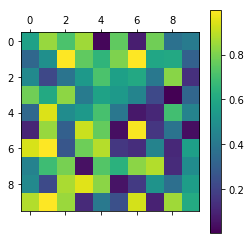

In [36]:
a = np.random.random((10,10))
plt.matshow(a)
plt.colorbar()

Use fill_freudenthal() to construct the triangulation:

In [37]:
>>> f_lower_star = d.fill_freudenthal(a)
>>> f_upper_star = d.fill_freudenthal(a, reverse = True)

Compute persistence as usual:

In [40]:
>>> p = d.homology_persistence(f_lower_star)
>>> dgms = d.init_diagrams(p, f_lower_star)

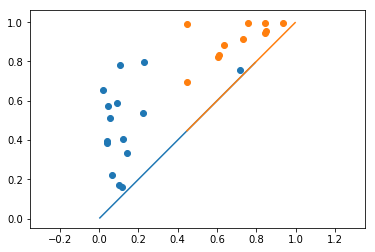

In [41]:
>>> d.plot.plot_diagram(dgms[0])
>>> d.plot.plot_diagram(dgms[1])


# Lower Star Image Filtrations  - ripser

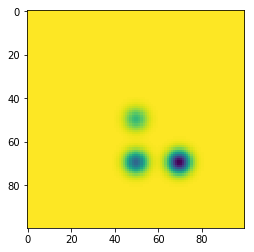

In [42]:
ts = np.linspace(-1, 1, 100)
x1 = np.exp(-ts**2/(0.1**2))
ts -= 0.4
x2 = np.exp(-ts**2/(0.1**2))
img = -x1[None, :]*x1[:, None] - 2*x1[None, :]*x2[:, None] - 3*x2[None, :]*x2[:, None]
plt.imshow(img)
plt.show()

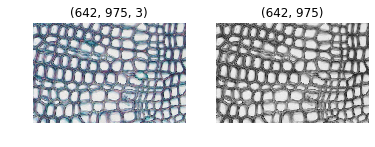

In [5]:
cells_original = plt.imread("Cells.jpg")
cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))

plt.subplot(121)
plt.title(cells_original.shape)
plt.imshow(cells_original)
plt.axis('off')
plt.subplot(122)
plt.title(cells_grey.shape)
plt.imshow(cells_grey, cmap='gray')
plt.axis('off')
plt.show()

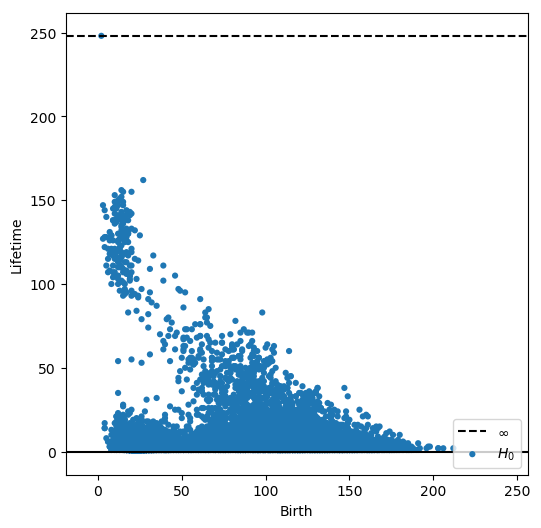

In [108]:
dgm = lower_star_img(-cells_grey)

plt.figure(figsize=(6, 6))
plot_diagrams(dgm, lifetime=True)
plt.show()

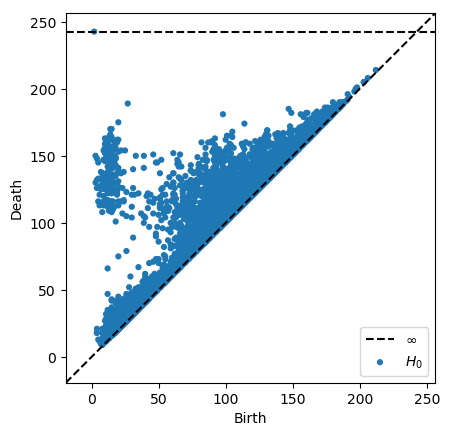

In [119]:
plot_diagrams(dgm)

In [118]:
dgm[14113]

array([149., 166.])

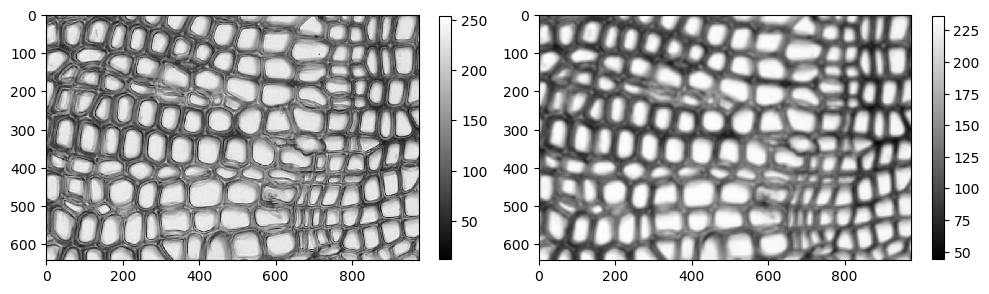

In [51]:
smoothed = ndimage.uniform_filter(cells_grey.astype(np.float64), size=10)
smoothed += 0.01 * np.random.randn(*smoothed.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
im = plt.imshow(cells_grey, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.tight_layout()
plt.show()

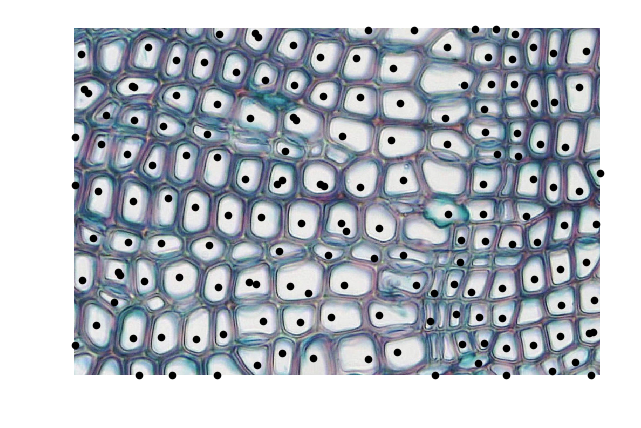

In [53]:
thresh = 70
idxs = np.arange(dgm.shape[0])
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]

plt.figure(figsize=(8, 5))
plt.imshow(cells_original)

X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.axis('off')

plt.show()

In [4]:
from scipy import sparse
def lower_star_img(img):
    """
    Construct a lower star filtration on an image
    Parameters
    ----------
    img: ndarray (M, N)
        An array of single channel image data
    Returns
    -------
    I: ndarray (K, 2)
        A 0-dimensional persistence diagram corresponding to the sublevelset filtration
    """
    m, n = img.shape

    idxs = np.arange(m * n).reshape((m, n))

    I = idxs.flatten()
    J = idxs.flatten()
    V = img.flatten()

    # Connect 8 spatial neighbors
    tidxs = np.ones((m + 2, n + 2), dtype=np.int64) * np.nan
    tidxs[1:-1, 1:-1] = idxs

    tD = np.ones_like(tidxs) * np.nan
    tD[1:-1, 1:-1] = img

    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:

            if di == 0 and dj == 0:
                continue

            thisJ = np.roll(np.roll(tidxs, di, axis=0), dj, axis=1)
            thisD = np.roll(np.roll(tD, di, axis=0), dj, axis=1)
            thisD = np.maximum(thisD, tD)
            #print('thisD', thisD)
            # Deal with boundaries
            boundary = ~np.isnan(thisD)
            
            thisI = tidxs[boundary]
            thisJ = thisJ[boundary]
            thisD = thisD[boundary]
            #print('dj', dj)
            #print("thisJ", thisJ)
            I = np.concatenate((I, thisI.flatten()))
            J = np.concatenate((J, thisJ.flatten()))
            V = np.concatenate((V, thisD.flatten()))
    #print("I", I)
    sparseDM = sparse.coo_matrix((V, (I, J)), shape=(idxs.size, idxs.size)).toarray()
    return sparseDM

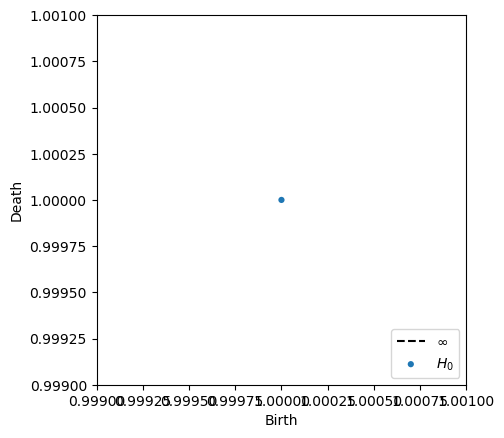

In [143]:
im = np.array([[1,2,3],[1,1,1], [72,8,9]])
w = lower_star_img(im)
dgms = ripser(w, distance_matrix=True, maxdim=0)["dgms"][0]
plot_diagrams(dgms)

In [144]:
w

array([[ 1.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  3.,  2.,  2.,  2.,  0.,  0.,  0.],
       [ 0.,  3.,  3.,  0.,  3.,  3.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  1.,  1.,  0., 72.,  8.,  0.],
       [ 1.,  2.,  3.,  1.,  1.,  1., 72.,  8.,  9.],
       [ 0.,  2.,  3.,  0.,  1.,  1.,  0.,  8.,  9.],
       [ 0.,  0.,  0., 72., 72.,  0., 72., 72.,  0.],
       [ 0.,  0.,  0.,  8.,  8.,  8., 72.,  8.,  9.],
       [ 0.,  0.,  0.,  0.,  9.,  9.,  0.,  9.,  9.]])

In [134]:
dgms = ripser(w, distance_matrix=True, maxdim=0)["dgms"][0]

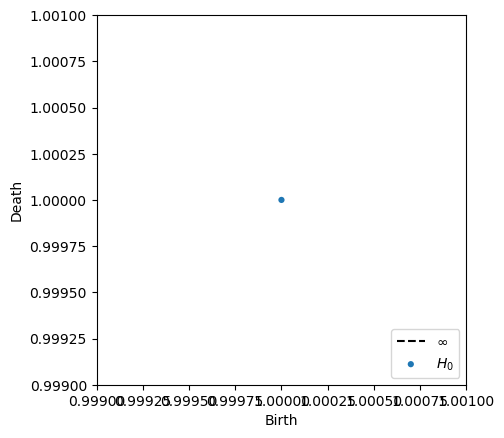

In [136]:
plot_diagrams(dgms)

# Help function to extract labels and diagrams using both libraries

In [11]:
w, v, lab = gudhi_help(data_dir0, 1)

Rips(maxdim=2, thresh=3, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


TypeError: pow expected at least 2 arguments, got 1

In [15]:
def new_diagon(diag):
    t = (0,1000)
    new_diag = []
    for i in diag:
        if(i[1][1] < 1):     
            new_diag.append(list(i[1])) 
        else:
            #new_diag.append(list(i[1])) 
            new_diag.append(list(t))
    new_diag = np.asarray(new_diag)
    return new_diag
def all_stat_diagr(data_dir, disease, begin, end, step):
    
    
    SH = tda.Silhouette(resolution=100, weight=pow(2))
    LS = tda.Landscape(resolution = 100)
    BC = tda.BettiCurve(resolution=100)
    CP = tda.ComplexPolynomial(threshold=-1, F="T")
    TV = tda.TopologicalVector(threshold=-1)
    
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=36851234)
    
    
    fs = os.listdir(data_dir)
    import re
    corr_dict = {}
    subs = []
    i = 0
    
    best_feature = [1,2,3]
    best_accurace = 0.001
    best_name = 'f'
    best_p = 0.1
    best_method = 't'
    best_std_score = 0

    for ind in np.arange(begin, end, step):
        rips = Rips(maxdim=1, coeff=2, do_cocycles=False,thresh=ind);
        for f in fs:
            #print(f)
            if (f == '.ipynb_checkpoints' or f == '.DS_Store'):
                continue
            
            sub = re.findall(r'\b\d+\b',f)[0]
            subs.append(sub)
            test = dic.get(sub)
            if sub not in corr_dict:
                if (test == 0 or test == disease):   
                    corr_dict[sub] = {}
                    #corr_dict[sub][test] = np.loadtxt(data_dir+f, delimiter=',', skiprows=4)
                    corr_dict[sub][test] = pd.read_csv(data_dir+f, index_col=[0]).values
                    #corr_dict[sub][test][np.abs(corr_dict[sub][test]) < ind] = 0
                    #corr_dict[sub][test] = corr_dict[sub][test][np.triu_indices(116, k = 1)]
                    #corr_dict[sub][test] = np.triu(corr_dict[sub][test],1)
        diagrams_h1 = []
        labels = []
        w = 0
        print('начало')
        for i, sub in enumerate(corr_dict):
            #print('i',i)
            #print('sub', sub)
            #print('test', test)
            
        #     if list(corr_dict[sub].keys())[0] == 3:
        #         w = w+1
            #print(list(corr_dict[sub].keys())[0])
            
            labels.append(list(corr_dict[sub].keys())[0]);
                # note that we use 1-corr because these are pearson correlations and hence 
                # this is a proper metric
                #print('corr',corr_dict[sub][test])
                #if (list(corr_dict[sub].values())[0] == 0):    
            dist = np.asarray(list(corr_dict[sub].values()))[0]
            distance_matrix = np.ones((dist.shape[0]),float) - dist
            rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=1.0)
            
            simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
            diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
            a = new_diagon(diag)
            #a = diag
            #print(a)
            #print('dist', dist)
            #a = rips.fit_transform(1-dist, distance_matrix=True)[1]
            #print('ups')
            diagrams_h1.append(a)
    return diagrams_h1, labels

Распечатка фичей для Кати

In [32]:
all_stat(data_dir0, 1, "1aroma_check_all_SCHZ.txt", "aroma_SCHZ_features.csv", "keys_aroma-schz.txt",1, 1.1, 0.2)
all_stat(data_dir0, 2, "1aroma_check_all_Bipolar.txt", "aroma_Bipolar_features.csv", "keys_aroma-bipolar.txt", 1, 1.1, 0.2)
all_stat(data_dir0, 3, "1aroma_check_all_ADHD.txt", "aroma_ADHD_features.csv", "keys_aroma-adhd.txt", 1, 1.1, 0.2)
all_stat(data_dir1, 1, "1fmriprep_check_all_SCHZ.txt", "bound_SCHZ_features.csv", "keys_bound-schz.txt", 1, 1.1, 0.2)
all_stat(data_dir1, 2, "1fmriprep_check_all_Bipolar.txt", "bound_Bipolar_features.csv","keys_bound-bipolar.txt", 1, 1.1, 0.2)
all_stat(data_dir1, 3, "1fmriprep_check_all_ADAD.txt", "bound_ADHD_features.csv","keys_bound-adhd.txt", 1, 1.1, 0.2)
all_stat(data_dir2, 1, "1openneuro_check_all_SCHZ.txt", "openneuro_SCHZ_features.csv","keys_openneuro-schz.txt", 1, 1.1, 0.2)
all_stat(data_dir2, 2, "1openneuro_check_all_BIPOLAR.txt", "openneuro_Bipolar_features.csv","keys_openneuro-bipolar.txt", 1, 1.1, 0.2)
all_stat(data_dir2, 3, "1openneuro_check_all_ADHD.txt", "openneuro_ADHD_features.csv", "keys_openneuro-adhd.txt", 1, 1.1, 0.2)

Rips(maxdim=1, thresh=1.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
начало
PersImage(pixels=[28, 28], spread=None, specs=None, kernel_type="gaussian", weighting_type="linear")
best_feature [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
best_accuracy 0.7111484593837535
best_std_score 0.03564434300232484
best_name QDA
best_method sh
best_p 1.0
Rips(maxdim=1, thresh=1.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
начало
PersImage(pixels=[28, 28], spread=None, specs=None, kernel_type="gaussian", weighting_type="linear")
best_feature [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
best_accuracy 0.7176181987946693
best_std_score 0.05724871194826923
best_name QDA
best_method bc
best_p 1.0
Rips(maxdim=1, thresh=1.0, coeff=2, do_cocycles=False, n_perm 

In [96]:
all_stat(data_dir0, 1, "new_aroma_check_all_SCHZ.txt", "new_aroma_SCHZ_features.csv", "new_keys_aroma-schz.txt",1, 1.1, 0.2)

Rips(maxdim=1, thresh=1.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
начало
[]
1


IndexError: list index out of range

# Gudhi

[(1, (0.39, 0.97)), (1, (0.77, 0.94)), (0, (0.0, inf)), (0, (0.0, 0.30000000000000004)), (0, (0.0, 0.28)), (0, (0.0, 0.26)), (0, (0.0, 0.10999999999999999))]


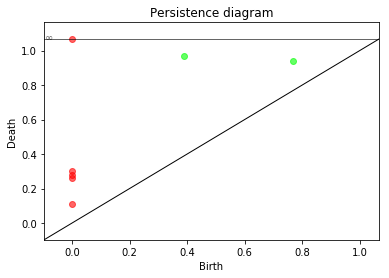

Rips complex is of dimension 2 - 25 simplices - 5 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[0, 4] -> 0.11
[1, 2] -> 0.26
[2, 3] -> 0.28
[3, 4] -> 0.30
[1, 4] -> 0.39
[0, 2] -> 0.77
[0, 1] -> 0.94
[0, 1, 2] -> 0.94
[0, 1, 4] -> 0.94
[2, 4] -> 0.97
[0, 2, 4] -> 0.97
[1, 2, 4] -> 0.97
[2, 3, 4] -> 0.97
[0, 3] -> 0.99
[1, 3] -> 0.99
[0, 1, 3] -> 0.99
[0, 2, 3] -> 0.99
[1, 2, 3] -> 0.99
[0, 3, 4] -> 0.99
[1, 3, 4] -> 0.99


In [276]:
import gudhi
import numpy as np

# User defined correlation matrix is:
# |1     0.06    0.23    0.01    0.89|
# |0.06  1       0.74    0.01    0.61|
# |0.23  0.74    1       0.72    0.03|
# |0.01  0.01    0.72    1       0.7 |
# |0.89  0.61    0.03    0.7     1   |
correlation_matrix=np.array([[1., 0.06, 0.23, 0.01, 0.89],
                            [0.06, 1., 0.74, 0.01, 0.61],
                            [0.23, 0.74, 1., 0.72, 0.03],
                            [0.01, 0.01, 0.72, 1., 0.7],
                            [0.89, 0.61, 0.03, 0.7, 1.]], float)




distance_matrix = np.ones((correlation_matrix.shape),float) - correlation_matrix
rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=1.0)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print(diag)
pplot = gudhi.plot_persistence_diagram(diag)
pplot.show()
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

In [86]:
w = new_diagon(diag)
w

[array([[0.39, 0.97],
        [0.77, 0.94],
        [0.  , 1.  ],
        [0.  , 0.3 ],
        [0.  , 0.28],
        [0.  , 0.26],
        [0.  , 0.11]])]

In [72]:
new_diag[0][0]

array([0.39, 0.97])

In [277]:
rips = gudhi.RipsComplex(points=[[0, 0], [1, 0], [0, 1], [1, 1]],
                         max_edge_length=42)

#####################################################################
RipsComplex creation from points
diag= [(0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


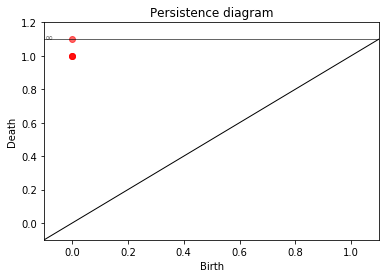

In [28]:
print("#####################################################################")
print("RipsComplex creation from points")
rips = gudhi.RipsComplex(points=[[0, 0], [1, 0], [0, 1], [1, 1]],
                         max_edge_length=42)

simplex_tree = rips.create_simplex_tree(max_dimension=1)


diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print("diag=", diag)

pplot = gudhi.plot_persistence_diagram(diag)
pplot.show()

In [116]:
tv = []
for i in range(0,len(diagrams_h1)):
        #print(i)
        if(len(diagrams_h1[i])==0):
            tv.append(0)
        else:
            
            p = TV.fit_transform([diagrams_h1[i]])[0]
            #print(type(p))
            tv.append(p)

tv = [it for it in tv]
#tv = np.asarray(tv)

X_train, X_test = feature[train_index], feature[test_index]
                   #print('X_trsain', X_train, 'X_test',X_test)
                   
y_train, y_test = labels[train_index], labels[test_index]
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
arr_score.append(clf.score(X_test, y_test))
    
arr_score = np.asanyarray(arr_score)
            #print(arr_score)
a = np.mean(arr_score)
std_score = arr_score.std() * 2


ValueError: setting an array element with a sequence.

In [293]:
import kmapper as km
from kmapper import jupyter

mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(q, projection='sum') # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, q, nr_cubes=10)

# Visualize it
html = mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

# Inline display
# jupyter.display(path_html="http://mlwave.github.io/tda/word2vec-gender-bias.html")
jupyter.display(path_html="make_circles_keplermapper_output.html")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: sum
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (172,)

..Projecting data using: sum


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
def all_stat(data_dir, disease, name_stat, begin, end, step):
    
    SH = tda.Silhouette(resolution=100, weight=pow(2))
    LS = tda.Landscape(resolution = 100)
    BC = tda.BettiCurve(resolution=100)
    CP = tda.ComplexPolynomial(threshold=-1, F="T")
    TV = tda.TopologicalVector(threshold=-1)
    
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
            random_state=36851234)
    
    
    fs = os.listdir(data_dir)
    
    corr_dict = {}
    subs = []
    i = 0
    labels = []
    best_feature = [1,2,3]
    best_accurace = 0.001
    best_name = 'f'
    best_p = 0.1
    best_method = 't'
    best_std_score = 0
    
    for f in fs:
        #print(f)
        if (f == '.ipynb_checkpoints' or f == '.DS_Store'):
            continue
        
        sub = re.findall(r'\b\d+\b',f)[0]
        subs.append(sub)
        test = dic.get(sub)
        if sub not in corr_dict:
            if (test == 0 or test == disease):   
                corr_dict[sub] = {}
                #corr_dict[sub][test] = np.loadtxt(data_dir+f, delimiter=',', skiprows=4)
                corr_dict[sub][test] = pd.read_csv(data_dir+f, index_col=[0]).values
                #corr_dict[sub][test][np.abs(corr_dict[sub][test]) < ind] = 0
                #corr_dict[sub][test] = corr_dict[sub][test][np.triu_indices(116, k = 1)]
                #corr_dict[sub][test] = np.triu(corr_dict[sub][test],1)
                labels.append(list(corr_dict[sub].keys())[0]);
    diagrams_h1 = []
    #labels = []
    w = 0
    with open(name_stat, 'w') as file: 
        for ind in np.arange(begin, end, step):
            rips = Rips(maxdim=1, coeff=2, do_cocycles=False,thresh=3)
            for i, sub in enumerate(corr_dict):
                #print('i',i)
                #print('sub', sub)
                #print('test', test)
                #print(list(corr_dict[sub].keys())[0])
                #print('list', list(corr_dict[sub].keys())[0])
                #print('len(list)', len(list(corr_dict[sub].keys())[0]))
                #labels = np.concatenate(labels, list(corr_dict[sub].keys())[0])
                #print(labels)
                #labels.append(list(corr_dict[sub].keys())[0]);
                    # note that we use 1-corr because these are pearson correlations and hence 
                    # this is a proper metric
                    #print('corr',corr_dict[sub][test])
                    #if (list(corr_dict[sub].values())[0] == 0):    
                dist = np.asarray(list(corr_dict[sub].values()))[0]
                #print('dist', dist)
                #a = rips.fit_transform(1-np.abs(dist), distance_matrix=True)[1]
                diagrams_h1.append(rips.fit_transform(1 - np.abs(dist), distance_matrix=True)[1]) #don't forget the distance matrix flag!
                    
            #print('w',w)        
            dgms = {}
            for i,sub in enumerate(corr_dict):
                dgms[sub] = []
                
                dgms[sub].append(rips.fit_transform(np.asarray(list(corr_dict[sub].values()))[0],distance_matrix=True)[1])
                
            pim = PersImage(pixels=([28,28]), spread=None)
            print(pim)
            ####methods applying
            imgs = pim.transform(diagrams_h1)
            imgs_array = np.array([img.flatten() for img in imgs])
            sh = SH.fit_transform(diagrams_h1)
            l = LS.fit_transform(diagrams_h1) 
            bc = BC.fit_transform(diagrams_h1)
            
            diagrams_h2 = []
            for x in diagrams_h1:
                if(len(x) != 0):
                    diagrams_h2.append(x)
                else:
                    diagrams_h2.append(np.asanyarray([[0,0]]))
            tv = TV.fit_transform(diagrams_h2)
            cp = CP.fit_transform(diagrams_h2)
            
            #cp = CP.fit_transform(diagrams_h1)   
        #     tv = []
        #     diagrams_h2 = [x for x in diagrams_h1 if len(x) != 0 else 0]
        #     #diagrams_h1 = diagrams_h1[2:] 
        #     for i in range(0,len(diagrams_h1)):
        #         #print(i)
        #         if(len(diagrams_h1[i])==0):
        #             tv.append(0)
        #         else:
                    
        #             p = TV.fit_transform([diagrams_h1[i]])
        #             tv.append(p)
        #     #tv = np.asarray(tv)
            features = [
                imgs_array,
                sh,
                l,
                bc,
                tv
            ] 
        
            # plt.figure(figsize=(20,20))
            
            # for i in range(100):
            #     plt.subplot(10,10,i+1)
            #     pim.show(imgs[i])
            
            
            #imgs_array = np.array([img.flatten() for img in imgs])
            
            labels = np.asarray(labels)
            # X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels, test_size=0.40, random_state=82, shuffle = True)
            
            # lr.fit(X_train, y_train)
            # y_pred = lr.predict(X_test)
            # print('lr_score ', lr.score(X_test, y_test))
            
            # lr = LogisticRegression()
            # rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
            #     random_state=36851234)
            # arr_score = []
            # labels = np.asarray(labels)
            # for train_index, test_index in rskf.split(imgs_array, labels):
            #     #print("TRAIN:", train_index, "TEST:", test_index)
            #     X_train, X_test = imgs_array[train_index], imgs_array[test_index]
            #     #print(train_index, test_index)
            #     y_train, y_test = labels[train_index], labels[test_index]
            #     lr.fit(X_train, y_train)
            #     y_pred = lr.predict(X_test)
            #     arr_score.append(lr.score(X_test, y_test))
            # print('lr_score_Strat_Kfold ', np.mean(arr_score))
            
            # clf = LogisticRegressionCV(cv=10, random_state=0, 
            #                            multi_class='multinomial').fit(imgs_array, labels)
            
            
            # print('cv_score', clf.score(imgs_array, labels))
            # inverse_image = np.copy(lr.coef_).reshape((30,30))
            # plt.figure()
            # pim.show(inverse_image)
            
            file.write('---------'+str(ind)+'---------')
            file.write('\n')
            #print('----------', ind, '-----------')
            for name_m, feature in zip(name_methods, features):
                file.write(name_m)
                file.write('\n')
                #print('----------'+name_m+'------------')
                for name, clf in zip(names, classifiers):
                    arr_score = []
                    for train_index, test_index in rskf.split(feature, labels):
                          
                    #print("TRAIN:", train_index, "TEST:", test_index)
                        X_train, X_test = feature[train_index], feature[test_index]
                           #print('X_trsain', X_train, 'X_test',X_test)
                           
                        y_train, y_test = labels[train_index], labels[test_index]
                        clf.fit(X_train, y_train)
                        y_pred = clf.predict(X_test)
                        arr_score.append(clf.score(X_test, y_test))
            
                    arr_score = np.asanyarray(arr_score)
                    #print(arr_score)
                    a = np.mean(arr_score)
                    std_score = arr_score.std() * 2
                    
                    if a>best_accurace:
                        best_accurace = a
                        best_name = name
                        best_p = ind
                        best_method = name_m
                        best_std_score = std_score
                        best_feature = feature
                    #print(np.std(arr_score))
                    #print(arr_score)
                    file.write(name+"Accuracy: %0.6f (+/- %0.6f)" % (a, std_score))
                    file.write('\n')
                    #print(name+"Accuracy: %0.6f (+/- %0.6f)" % (a, std_score))
            file.write('-----------------------------------')
            file.write('-----------------------------------')
            file.write('-----------------------------------')
            file.write('\n')
            file.write('best_accuracy' + str(best_accurace) + '\n')
            file.write('best_std_score' + str(best_std_score) + '\n')
            file.write('best_name' + str(best_name) + '\n')
            file.write('best_method' + str(best_method) + '\n')
            file.write('best_p' +  str(best_p) + '\n')
            with open("best", 'w') as file_best:
                for u in best_feature:    
                    file_best.write(str(u)+' ')
                file_best.write('\n')
    print('best_accuracy', best_accurace)
    print('best_std_score', best_std_score)
    print('best_name', best_name)
    print('best_method', best_method)
    print('best_p', best_p)